In [1]:
from getpass import getpass

admin_rdm_url = 'https://admin.bh.rdm.yzwlab.com/' #'https://admin.staging.rdm.example.com/'
idp_name_1 = None # 'GakuNin RDM IdP'
idp_username_1 = None
idp_password_1 = None
default_result_path = None
close_on_fail = False
transition_timeout = 30000
# 検索用ノード情報
search_node_id = 'qe29y'
search_node_title = 'TEST-METADATA-202502082306'

In [2]:
if idp_username_1 is None:
    idp_username_1 = input(prompt=f'Username for {idp_name_1}')
if idp_password_1 is None:
    idp_password_1 = getpass(prompt=f'Password for {idp_username_1}@{idp_name_1}')
(len(idp_username_1), len(idp_password_1))

# 定期監視-管理者-ノード管理

- サブシステム名: 管理者
- ページ/アドオン: 管理者
- 機能分類: ログイン
- シナリオ名: ログイン確認
- 用意するテストデータ: URL一覧、アカウント(管理者ユーザー1: GRDM)
- 備考: https://bitbucket.org/osf_japan/operations/src/master/ARI/%E9%81%8B%E7%94%A8%E6%89%8B%E9%A0%86%E6%9B%B8/%E7%9B%A3%E8%A6%96/%E8%BF%BD%E5%8A%A0%E7%9B%A3%E8%A6%96_%E7%AE%A1%E7%90%86%E8%80%85%E7%94%BB%E9%9D%A2%E3%83%AD%E3%82%B0%E3%82%A4%E3%83%B3%E7%A2%BA%E8%AA%8D.md

## GakuNin RDM管理者ページのURLを開く

①ブラウザを開き、画面右上の設定メニューから「シークレットモードで開く」を選択する。  
②新規画面が開かれ、画面上において、「シークレットモードです」と表示されていることを確認する。
以下、シークレットモードにて確認を行う。


In [3]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/tmp/tmp9jjb7i04'

In [4]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20250420-214904', '/tmp/tmppcq0_usw')

Start epoch: 1745185744.847318 seconds


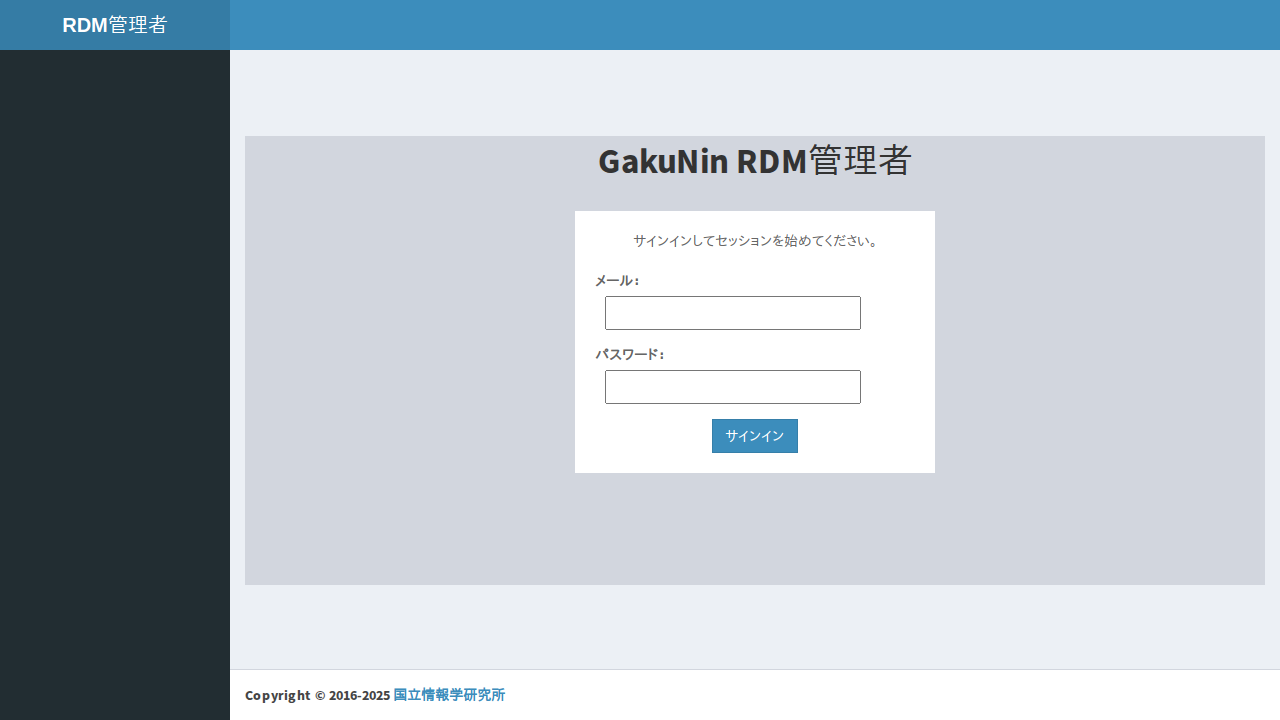

In [5]:
import time

async def _step(page):
    await page.goto(admin_rdm_url)

    await expect(page.locator('.login-logo')).to_be_visible(timeout=30000)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1745185747.536609 seconds


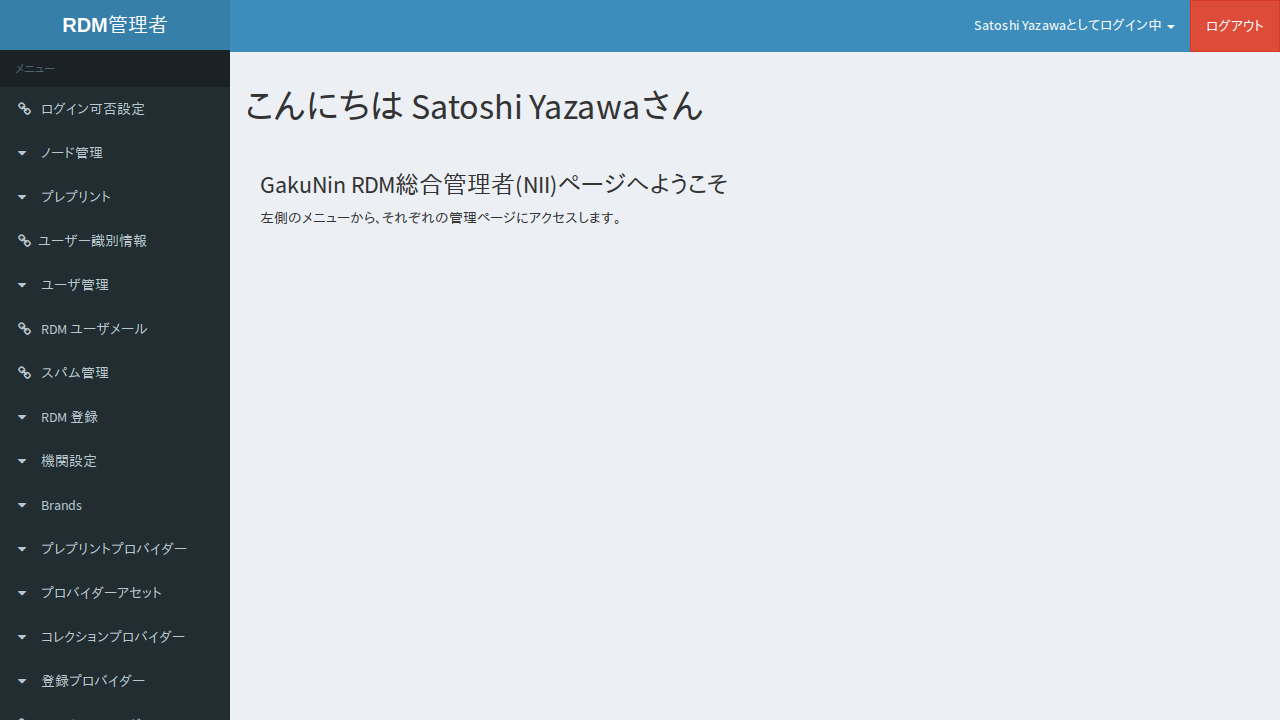

In [6]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login_as_admin(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    await expect(page.locator('//*[contains(@class, "btn-danger") and contains(text(), "ログアウト")]')).to_be_enabled(timeout=transition_timeout)

await run_pw(_step)

## 「ノード管理」から「ノード管理」を選択する。

ノードGUID検索画面が表示される

Start epoch: 1745185918.345845 seconds


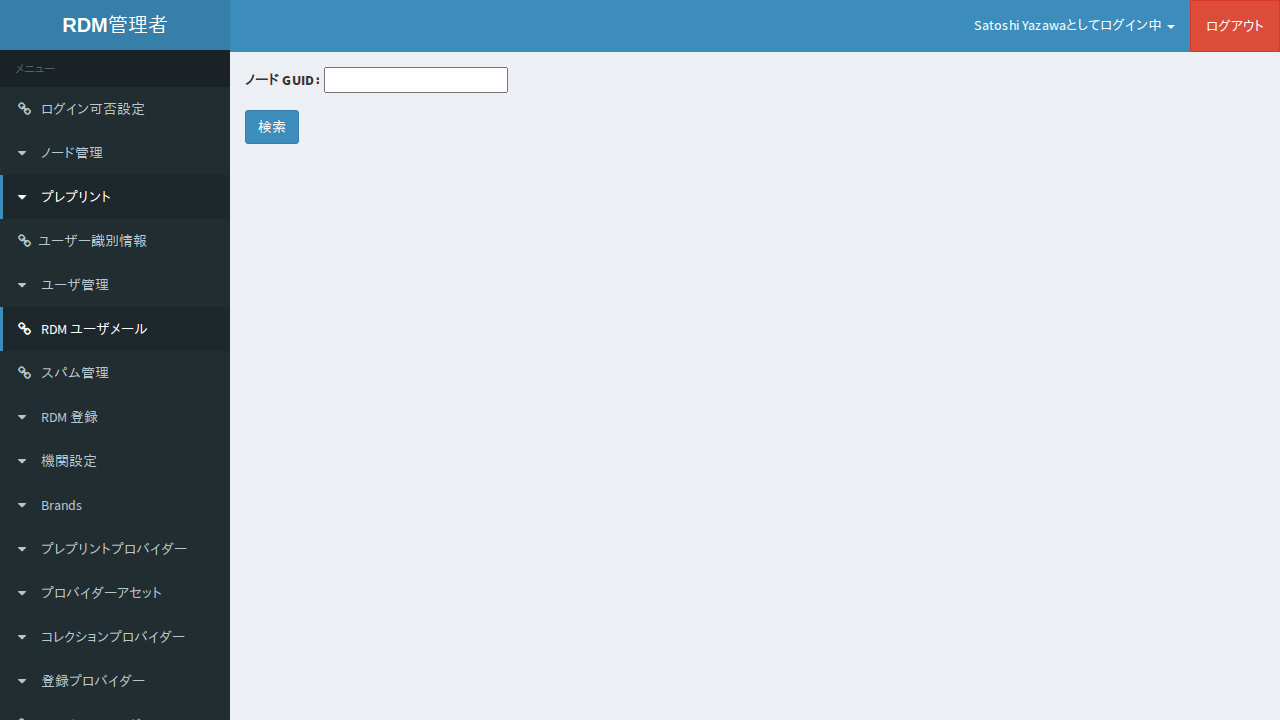

In [7]:
async def _step(page):
    await page.locator('//a[@href = "#collapseNodes"]').click()
    await page.locator('//a[@href = "/nodes/"]').click()

    await expect(page.locator('//input[@name = "guid"]')).to_be_visible(timeout=transition_timeout * 5)

await run_pw(_step)

## ノードGUID欄に"529tr"と入力し、「検索」ボタンを押下する

該当のプロジェクトが表示される

※存在しない場合はテスト用のプロジェクトIDを指定する。

Start epoch: 1745186296.7624369 seconds


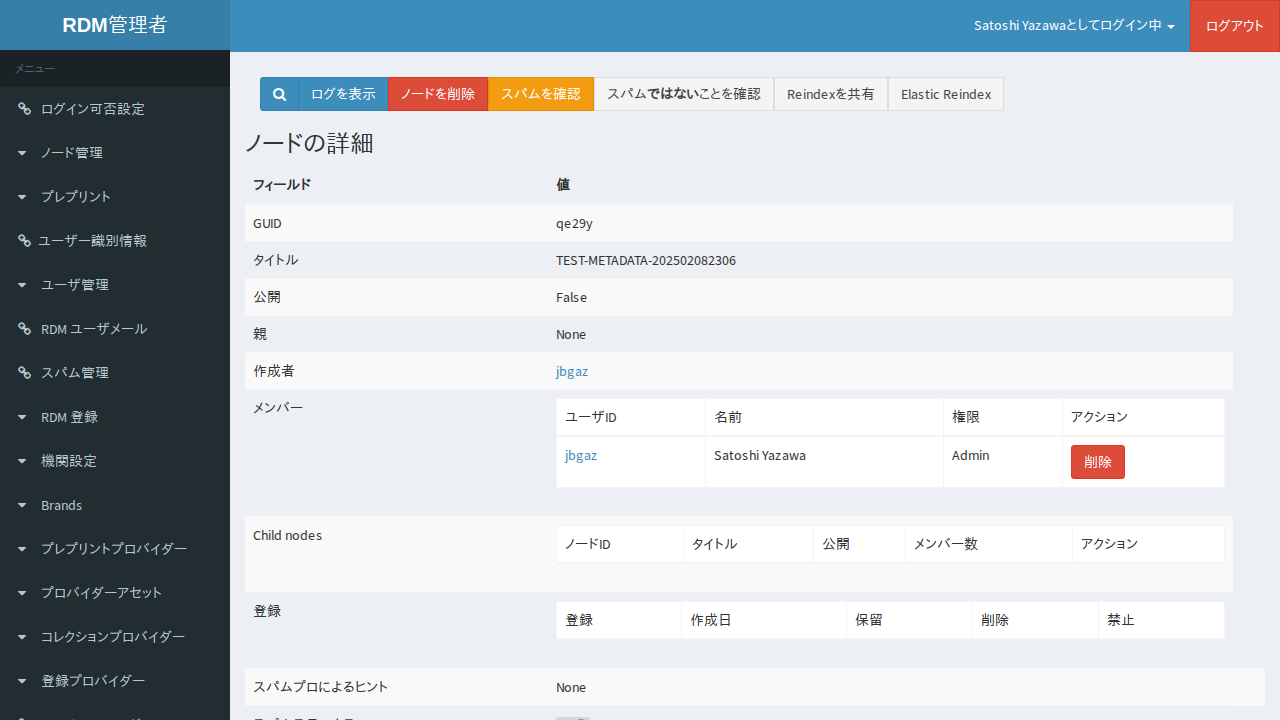

In [9]:
async def _step(page):
    await page.locator('//input[@name = "guid"]').fill(search_node_id)
    await page.locator('//input[@type = "submit"]').click()

    await expect(page.locator(f'//td[contains(text(), "{search_node_title}")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

終了処理を実施。

In [10]:
await finish_pw_context()

Video: /tmp/tmp9jjb7i04/video-1.webm
HAR: /tmp/tmp9jjb7i04/har.zip


In [11]:
!rm -fr {work_dir}